<a href="https://colab.research.google.com/github/fabianorc2506-sys/Fundamentos-em-Ci-ncias-de-Dados/blob/main/Trabalho_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

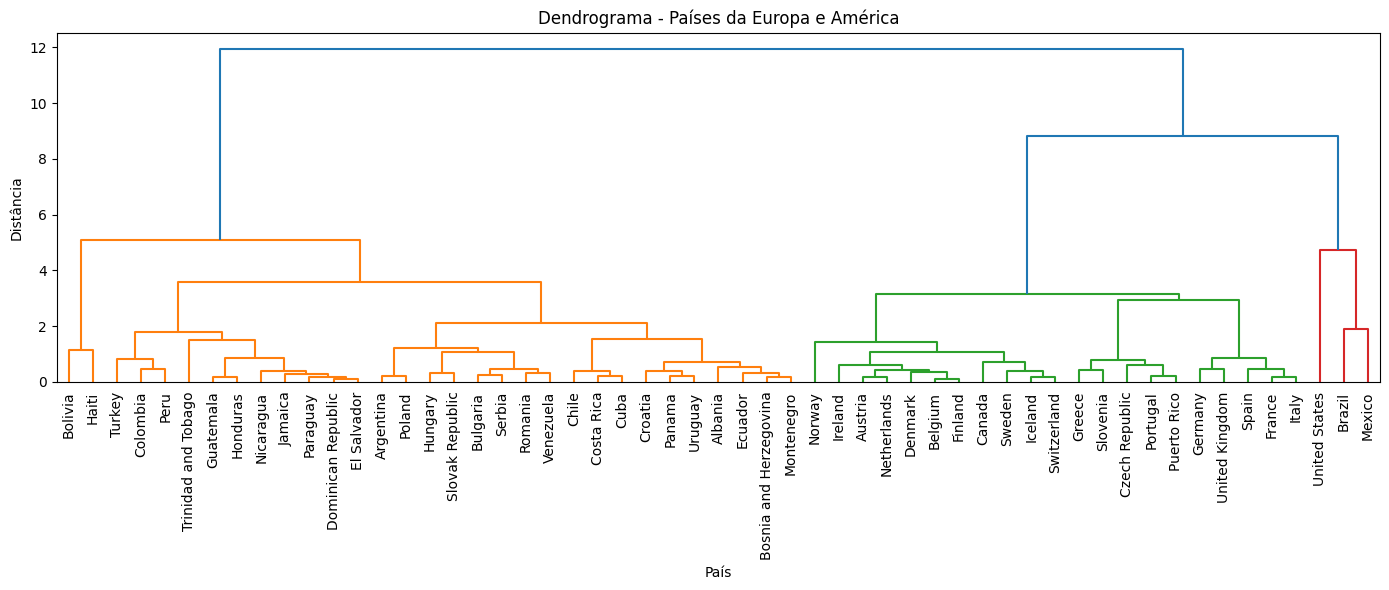

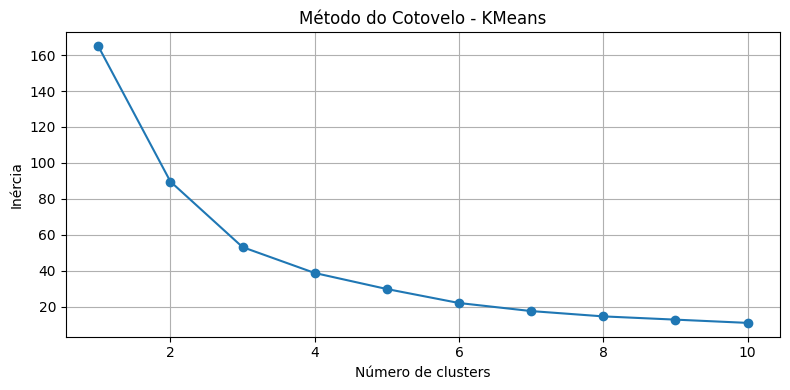

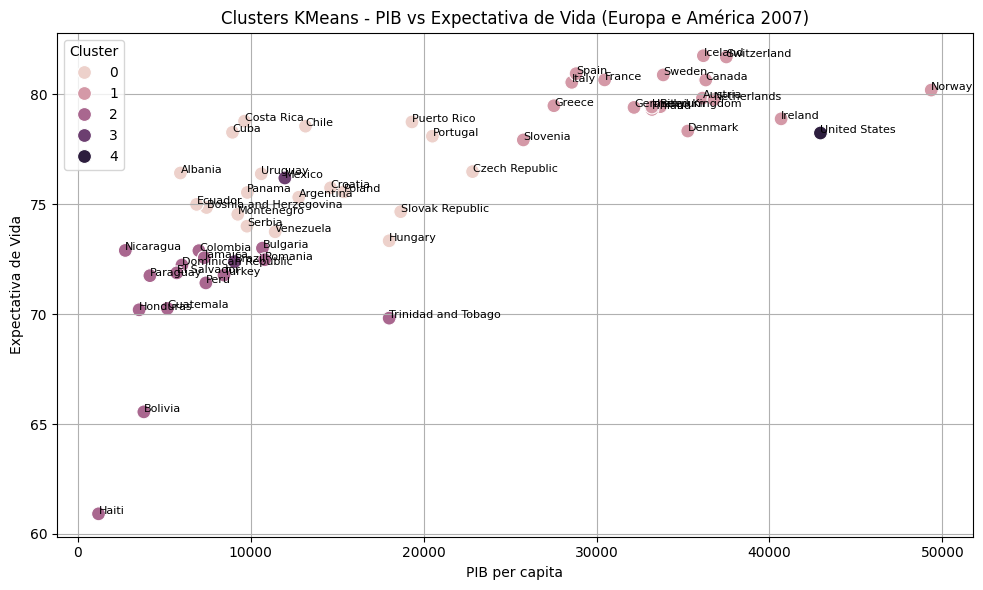


Países por Cluster (KMeans):

🔷 Cluster 0:
 - Albania (Europe)
 - Argentina (Americas)
 - Bosnia and Herzegovina (Europe)
 - Chile (Americas)
 - Costa Rica (Americas)
 - Croatia (Europe)
 - Cuba (Americas)
 - Czech Republic (Europe)
 - Ecuador (Americas)
 - Hungary (Europe)
 - Montenegro (Europe)
 - Panama (Americas)
 - Poland (Europe)
 - Portugal (Europe)
 - Puerto Rico (Americas)
 - Serbia (Europe)
 - Slovak Republic (Europe)
 - Uruguay (Americas)
 - Venezuela (Americas)

🔷 Cluster 1:
 - Austria (Europe)
 - Belgium (Europe)
 - Canada (Americas)
 - Denmark (Europe)
 - Finland (Europe)
 - France (Europe)
 - Germany (Europe)
 - Greece (Europe)
 - Iceland (Europe)
 - Ireland (Europe)
 - Italy (Europe)
 - Netherlands (Europe)
 - Norway (Europe)
 - Slovenia (Europe)
 - Spain (Europe)
 - Sweden (Europe)
 - Switzerland (Europe)
 - United Kingdom (Europe)

🔷 Cluster 2:
 - Bolivia (Americas)
 - Bulgaria (Europe)
 - Colombia (Americas)
 - Dominican Republic (Americas)
 - El Salvador (Americas)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

# Dataset com países, PIB, expectativa de vida e população
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df = pd.read_csv(url)

# Filtra apenas dados da Europa e América no ano mais recente (2007)
# Corrected filtering using .isin()
df_euro = df[(df['continent'].isin(['Europe', 'Americas'])) & (df['year'] == 2007)].copy()

# Seleção de variáveis
features = ['gdpPercap', 'lifeExp', 'pop']
countries = df_euro['country'].values
X = df_euro[features].values

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agrupamento hierárquico
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma - Países da Europa e América")
plt.xlabel("País")
plt.ylabel("Distância")
plt.tight_layout()
plt.show()

# Método do cotovelo para KMeans
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), distortions, marker='o')
plt.title("Método do Cotovelo - KMeans")
plt.xlabel("Número de clusters")
plt.ylabel("Inércia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicando KMeans com k=3 (ou outro valor observado no cotovelo)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_euro['Cluster_KMeans'] = clusters

# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_euro, x='gdpPercap', y='lifeExp', hue='Cluster_KMeans', s=100)
for i in range(len(df_euro)):
    plt.text(df_euro['gdpPercap'].iloc[i], df_euro['lifeExp'].iloc[i], df_euro['country'].iloc[i], fontsize=8)
plt.title("Clusters KMeans - PIB vs Expectativa de Vida (Europa e América 2007)")
plt.xlabel("PIB per capita")
plt.ylabel("Expectativa de Vida")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Impressão dos países por cluster (com continente)
print("\nPaíses por Cluster (KMeans):")
for cluster_id in sorted(df_euro['Cluster_KMeans'].unique()):
    print(f"\n🔷 Cluster {cluster_id}:")
    cluster_data = df_euro[df_euro['Cluster_KMeans'] == cluster_id]
    for _, row in cluster_data.iterrows():
        print(f" - {row['country']} ({row['continent']})")
